# Diseases Prediction

### Regression Algrithms

In [1]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [2]:
#Disease dataset
data=pd.read_csv('Training.csv')

In [146]:
len(data)

4920

In [3]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [5]:
#Getting information about columns
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
data.isna().sum()
#No null values found

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [8]:
data1=data[['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue','prognosis']]
#Eliminating some columns for insights

In [9]:
data1.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,prognosis
0,1,1,1,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,Fungal infection


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 11 columns):
itching                 4920 non-null int64
skin_rash               4920 non-null int64
nodal_skin_eruptions    4920 non-null int64
continuous_sneezing     4920 non-null int64
shivering               4920 non-null int64
chills                  4920 non-null int64
joint_pain              4920 non-null int64
stomach_pain            4920 non-null int64
acidity                 4920 non-null int64
ulcers_on_tongue        4920 non-null int64
prognosis               4920 non-null object
dtypes: int64(10), object(1)
memory usage: 422.9+ KB


In [11]:
data1.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
chills                  0
joint_pain              0
stomach_pain            0
acidity                 0
ulcers_on_tongue        0
prognosis               0
dtype: int64

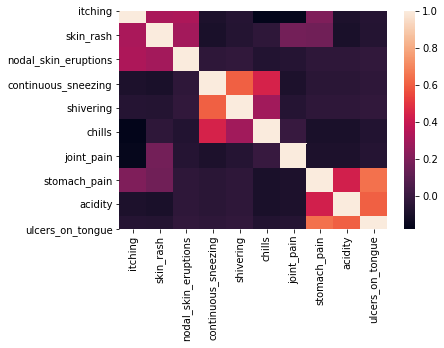

In [12]:
sea.heatmap(data1.corr())
#heatmap of seaborn library for knowing the correlation of columns

In [13]:
l=list(data1['prognosis'])

In [14]:
s=list(set(l))
print(len(s))

41


In [15]:
#Mapping integer values to prognosis column.
dic={}
for i in range(len(s)):
    dic[s[i]]=i
print(dic)    

{'Allergy': 0, 'Jaundice': 1, 'Hypertension ': 2, 'Varicose veins': 3, 'Pneumonia': 4, 'Hyperthyroidism': 5, 'Hepatitis B': 6, 'Hepatitis C': 7, 'Malaria': 8, 'Arthritis': 9, 'Hypothyroidism': 10, 'Alcoholic hepatitis': 11, '(vertigo) Paroymsal  Positional Vertigo': 12, 'Chronic cholestasis': 13, 'Heart attack': 14, 'Migraine': 15, 'Hypoglycemia': 16, 'Impetigo': 17, 'Dimorphic hemmorhoids(piles)': 18, 'Fungal infection': 19, 'Chicken pox': 20, 'Bronchial Asthma': 21, 'Psoriasis': 22, 'Cervical spondylosis': 23, 'AIDS': 24, 'Drug Reaction': 25, 'Common Cold': 26, 'Dengue': 27, 'Hepatitis D': 28, 'Osteoarthristis': 29, 'Gastroenteritis': 30, 'Hepatitis E': 31, 'Peptic ulcer diseae': 32, 'Acne': 33, 'Typhoid': 34, 'Paralysis (brain hemorrhage)': 35, 'hepatitis A': 36, 'Diabetes ': 37, 'Tuberculosis': 38, 'GERD': 39, 'Urinary tract infection': 40}


In [16]:
data1['prognosis']=data1['prognosis'].map(dic)

C:\Users\anush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


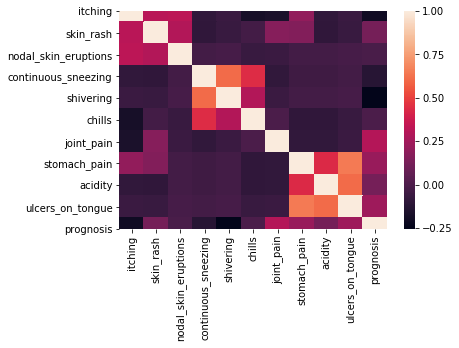

In [17]:
sea.heatmap(data1.corr())
# now the heatmap include prognosis as well

In [18]:
x=data1[['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue']]
y=data1['prognosis']
#Splitting of data in x and y(the predicting column)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
#training and testing

Using LinearRegression for watching the small data's behaviour

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
x_pred=[[1,1,0,0,0,1,1,0,1,0]]
pred=int(model.predict(x_pred))
for i in dic:
    if pred==dic[i]:
        print(i)
        break        
#after prediction checking the disease        

Chicken pox


In [22]:
x_pre=[[0,1,0,0,0,0,1,0,0,0]]
pre=int(model.predict(x_pre))-1
for i in dic:
    if pre==dic[i]:
        print(i,pre)
        break 

Osteoarthristis 29


In [23]:
data1.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,prognosis
4915,0,0,0,0,0,0,0,0,0,0,12
4916,0,1,0,0,0,0,0,0,0,0,33
4917,0,0,0,0,0,0,0,0,0,0,40
4918,0,1,0,0,0,0,1,0,0,0,22
4919,0,1,0,0,0,0,0,0,0,0,17


In [24]:
predictions = model.predict(x_test)

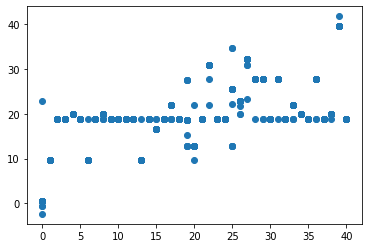

In [25]:
plt.scatter(y_test,predictions)

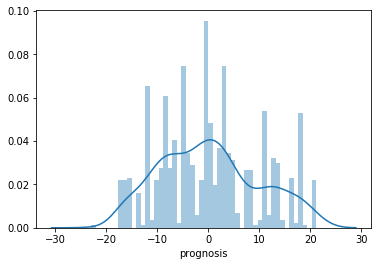

In [26]:
sea.distplot((y_test-predictions),bins=50);
#how much predictions and test labels differ

Now logistic regression for checking the probability concept

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_predictions = model1.predict(x_test)

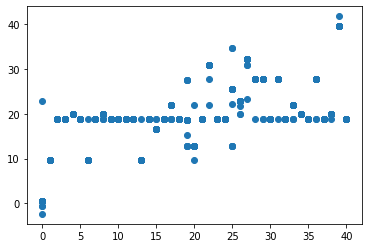

In [30]:
plt.scatter(y_test,predictions)
#behaviour of logistic regression model

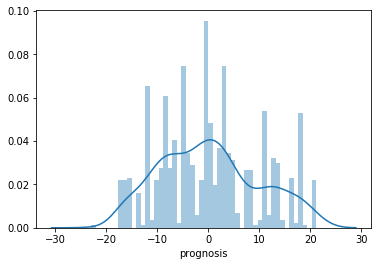

In [31]:
sea.distplot((y_test-predictions),bins=50);

In [32]:
pd.get_dummies(data)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Now calculating everything again for whole dataset

In [33]:
labels=np.array(data['prognosis'])

In [34]:
dict={}
disease=list(set(labels))
for i in range(len(disease)):
    dict[disease[i]]=i
print(dict)    

{'Allergy': 0, 'Jaundice': 1, 'Hypertension ': 2, 'Varicose veins': 3, 'Pneumonia': 4, 'Hyperthyroidism': 5, 'Hepatitis B': 6, 'Hepatitis C': 7, 'Malaria': 8, 'Arthritis': 9, 'Hypothyroidism': 10, 'Alcoholic hepatitis': 11, '(vertigo) Paroymsal  Positional Vertigo': 12, 'Chronic cholestasis': 13, 'Heart attack': 14, 'Migraine': 15, 'Hypoglycemia': 16, 'Impetigo': 17, 'Dimorphic hemmorhoids(piles)': 18, 'Fungal infection': 19, 'Chicken pox': 20, 'Bronchial Asthma': 21, 'Psoriasis': 22, 'Cervical spondylosis': 23, 'AIDS': 24, 'Drug Reaction': 25, 'Common Cold': 26, 'Dengue': 27, 'Hepatitis D': 28, 'Osteoarthristis': 29, 'Gastroenteritis': 30, 'Hepatitis E': 31, 'Peptic ulcer diseae': 32, 'Acne': 33, 'Typhoid': 34, 'Paralysis (brain hemorrhage)': 35, 'hepatitis A': 36, 'Diabetes ': 37, 'Tuberculosis': 38, 'GERD': 39, 'Urinary tract infection': 40}


In [35]:
data['prognosis']=labels
data['prognosis']=data['prognosis'].map(dic)

In [36]:
data3=pd.read_csv('Training.csv')
data3

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [37]:
data3['prognosis']=data3['prognosis'].map(dict)
data3

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,33
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,22


In [38]:
label=np.array(data3['prognosis'])
label

array([19, 19, 19, ..., 40, 22, 17], dtype=int64)

In [39]:
data3.drop('prognosis',axis=1,inplace=True)

In [40]:
features_list=list(data3.columns)

In [41]:
data_features=np.array(data3)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_features,label,test_size=0.25,random_state=20)

In [43]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3690, 132) (1230, 132) (3690,) (1230,)


### Now using Random Forest Regressor for making the model

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 20)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=20, verbose=0,
                      warm_start=False)

In [45]:
predictions = rf.predict(x_test)

In [46]:
errors = abs(predictions - y_test)

In [47]:
np.mean(errors)
#error mean is low

0.028869105691056933

In [48]:
mape = 100 * (errors / y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#This can't be calculated because some of the error values are zero

Accuracy: nan %.


C:\Users\anush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\anush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [49]:
errors

array([0.   , 0.   , 0.   , ..., 1.028, 0.   , 0.006])

In [50]:
predictions

array([36.   , 21.   , 39.   , ...,  4.028, 24.   ,  4.006])

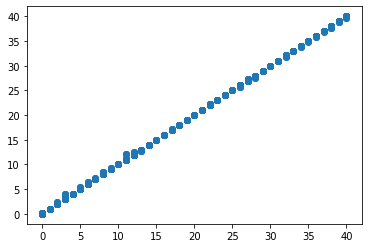

In [51]:
plt.scatter(y_test,predictions)
#now the predictions are almost same as test labels

In [52]:
predicted=rf.predict([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
predicted

array([19.])

In [53]:
for i in dict:
    if predicted==dict[i]:
        print("You may have :",i)
#and prediction the value as well but needs conversion 

You may have : Fungal infection


#### Classification algorithms

Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [55]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
y_pred=dt.predict(x_test)

In [57]:
y_pred

array([36, 21, 39, ...,  3, 24,  4], dtype=int64)

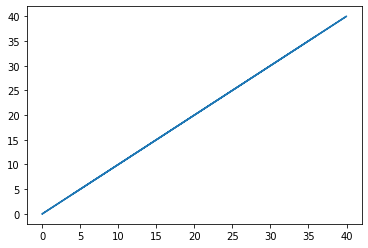

In [58]:
plt.plot(y_pred,y_test)

In [59]:
for i,j  in zip(y_pred,y_test):
    print(i,j)

36 36
21 21
39 39
13 13
29 29
22 22
4 4
34 34
32 32
2 2
7 7
15 15
27 27
28 28
39 39
27 27
10 10
23 23
33 33
15 15
26 26
35 35
15 15
3 3
37 37
30 30
23 23
13 13
8 8
31 31
39 39
5 5
34 34
10 10
14 14
37 37
15 15
19 19
9 9
25 25
38 38
30 30
9 9
10 10
6 6
8 8
32 32
26 26
5 5
30 30
16 16
13 13
37 37
3 3
22 22
26 26
4 4
35 35
14 14
21 21
4 4
23 23
15 15
22 22
18 18
12 12
13 13
35 35
32 32
40 40
32 32
28 28
12 12
18 18
8 8
17 17
6 6
8 8
9 9
9 9
17 17
37 37
0 0
34 34
14 14
3 3
40 40
22 22
9 9
13 13
3 3
0 0
37 37
2 2
27 27
39 39
37 37
27 27
19 19
9 9
3 3
26 26
31 31
37 37
27 27
0 0
15 15
10 10
18 18
28 28
14 14
6 6
21 21
18 18
4 4
10 10
38 38
7 7
31 31
8 8
22 22
36 36
13 13
31 31
23 23
30 30
0 0
22 22
30 30
14 14
38 38
2 2
33 33
17 17
12 12
22 22
28 28
35 35
24 24
10 10
10 10
2 2
5 5
29 29
6 6
24 24
7 7
37 37
29 29
37 37
30 30
34 34
18 18
30 30
11 11
29 29
17 17
22 22
33 33
34 34
23 23
24 24
34 34
35 35
6 6
22 22
19 19
29 29
6 6
1 1
28 28
39 39
13 13
21 21
20 20
17 17
0 0
11 11
38 38
11 11
36 3

In [60]:
predicted=dt.predict([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
predicted

array([19], dtype=int64)

In [61]:
for i in dict:
    if predicted==dict[i]:
        print("You may have :",i)

You may have : Fungal infection


In [62]:
decisiontreedata=pd.read_csv('Training.csv')

In [63]:
y=decisiontreedata['prognosis']

In [64]:
decisiontreedata.drop('prognosis',axis=1,inplace=True)

In [65]:
x=decisiontreedata

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [67]:
dtc = DecisionTreeClassifier()

In [68]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
y_predictedtest=dtc.predict(x_test)

In [70]:
y_predictedtest

array(['hepatitis A', 'Bronchial Asthma', 'GERD', ..., 'Varicose veins',
       'AIDS', 'Pneumonia'], dtype=object)

In [71]:
for i,j in zip(y_predictedtest,y_test):
    print(i,j)

hepatitis A hepatitis A
Bronchial Asthma Bronchial Asthma
GERD GERD
Chronic cholestasis Chronic cholestasis
Osteoarthristis Osteoarthristis
Psoriasis Psoriasis
Pneumonia Pneumonia
Typhoid Typhoid
Peptic ulcer diseae Peptic ulcer diseae
Hypertension  Hypertension 
Hepatitis C Hepatitis C
Migraine Migraine
Dengue Dengue
Hepatitis D Hepatitis D
GERD GERD
Dengue Dengue
Hypothyroidism Hypothyroidism
Cervical spondylosis Cervical spondylosis
Acne Acne
Migraine Migraine
Common Cold Common Cold
Paralysis (brain hemorrhage) Paralysis (brain hemorrhage)
Migraine Migraine
Varicose veins Varicose veins
Diabetes  Diabetes 
Gastroenteritis Gastroenteritis
Cervical spondylosis Cervical spondylosis
Chronic cholestasis Chronic cholestasis
Malaria Malaria
Hepatitis E Hepatitis E
GERD GERD
Hyperthyroidism Hyperthyroidism
Typhoid Typhoid
Hypothyroidism Hypothyroidism
Heart attack Heart attack
Diabetes  Diabetes 
Migraine Migraine
Fungal infection Fungal infection
Arthritis Arthritis
Drug Reaction Drug Rea

Pneumonia Pneumonia
Paralysis (brain hemorrhage) Paralysis (brain hemorrhage)
Paralysis (brain hemorrhage) Paralysis (brain hemorrhage)
Chicken pox Chicken pox
Hepatitis B Hepatitis B
Cervical spondylosis Cervical spondylosis
Fungal infection Fungal infection
Osteoarthristis Osteoarthristis
Dengue Dengue
Migraine Migraine
Osteoarthristis Osteoarthristis
Hyperthyroidism Hyperthyroidism
Malaria Malaria
Arthritis Arthritis
Typhoid Typhoid
Fungal infection Fungal infection
Diabetes  Diabetes 
(vertigo) Paroymsal  Positional Vertigo (vertigo) Paroymsal  Positional Vertigo
Allergy Allergy
Urinary tract infection Urinary tract infection
Hyperthyroidism Hyperthyroidism
Hypoglycemia Hypoglycemia
Pneumonia Pneumonia
Heart attack Heart attack
Urinary tract infection Urinary tract infection
Gastroenteritis Gastroenteritis
Alcoholic hepatitis Alcoholic hepatitis
Acne Acne
AIDS AIDS
Chronic cholestasis Chronic cholestasis
Peptic ulcer diseae Peptic ulcer diseae
(vertigo) Paroymsal  Positional Vertig

In [72]:
predicted=dtc.predict([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
predicted

array(['Fungal infection'], dtype=object)

Multinomial Naive Bayes implementation

In [73]:
from sklearn import preprocessing

In [74]:
labelencoder=preprocessing.LabelEncoder()

In [75]:
from sklearn.naive_bayes import MultinomialNB 

In [76]:
mnb=MultinomialNB()

In [77]:
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [78]:
mnb.predict_proba([[0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([[1.37087743e-03, 4.85169230e-03, 3.95431083e-03, 9.90243627e-04,
        4.17300332e-01, 2.12654924e-03, 1.09831325e-01, 2.46850715e-03,
        1.46037732e-04, 1.04575699e-03, 2.90232582e-05, 7.44979920e-05,
        1.94342181e-02, 1.86551606e-03, 1.86741990e-01, 4.62904274e-03,
        1.08849600e-01, 5.13818827e-03, 4.07821814e-03, 1.30461737e-04,
        1.04323260e-01, 2.90565586e-04, 7.91988471e-05, 2.03311510e-03,
        1.44975644e-04, 9.36105876e-05, 7.64122562e-05, 2.38774419e-03,
        3.74029881e-04, 4.28922798e-04, 2.70787947e-04, 1.19973082e-03,
        4.70766305e-03, 1.37983007e-03, 1.40834466e-04, 1.37251643e-03,
        3.62805921e-05, 1.64508580e-04, 4.39715406e-03, 9.00615345e-04,
        1.41855926e-04]])

In [79]:
y_predictedtest=dtc.predict(x_test)

In [80]:
y_predictedtest

array(['hepatitis A', 'Bronchial Asthma', 'GERD', ..., 'Varicose veins',
       'AIDS', 'Pneumonia'], dtype=object)

In [81]:
predicted=dtc.predict([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
predicted

array(['Fungal infection'], dtype=object)

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
mn = GaussianNB()

In [84]:
print(mn.fit(x_train,y_train).predict([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))

['Fungal infection']


In [85]:
print(mn.class_prior_)
l=list(mn.class_prior_)
l.index(max(mn.class_prior_))

[0.02303523 0.02357724 0.02655827 0.02140921 0.02330623 0.02439024
 0.02439024 0.02357724 0.02466125 0.02086721 0.02466125 0.02276423
 0.02439024 0.02601626 0.02601626 0.02520325 0.02520325 0.02303523
 0.02628726 0.02276423 0.02466125 0.02520325 0.02466125 0.02628726
 0.02466125 0.02574526 0.02493225 0.02384824 0.02682927 0.02520325
 0.02601626 0.02439024 0.02411924 0.02303523 0.02493225 0.02276423
 0.02466125 0.02357724 0.02520325 0.02222222 0.02493225]


28

In [86]:
print(mn.classes_)

['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


In [87]:
l=mnb.classes_.tolist()
print(l)

['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes ', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']


In [88]:
mn.predict_proba([[0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 9.19939302e-20, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.01204844e-09, 0.00000000e+00,
        4.53977014e-19, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.72616745e-23, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [89]:
prob=(mn.predict_proba([[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1]]
                         )).reshape(41,1).tolist()
top5=[]
print(type(prob[0][0]))
for i in range(len(prob)):
    if prob[i][0]!=0.0:
        print(l[i],"= ",prob[i])
        

<class 'float'>
Acne =  [0.025789046207468407]
Allergy =  [0.9742105626874066]
Bronchial Asthma =  [1.5470734675790496e-17]
Cervical spondylosis =  [6.832353052508352e-11]
Impetigo =  [1.370207943902294e-11]


In [90]:
print(x_train.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)


In [116]:
symptom=np.zeros([132],dtype=float)
user_symptoms = ['shivering','blackheads','scurring','joint_pain']
m=[]
for i in range(len(x_train.columns)):
    if x_train.columns[i] in user_symptoms:
        m.append(i)
for i in m:
    symptom[i]=1

### GAUSIAN NAIVE BAYES PROBABILITIES

In [118]:
probab=mn.predict_proba([symptom]).tolist()
for i in range(len(probab[0])):
    if probab[0][i]!=0.0:
        print(l[i],"= ",probab[0][i])

Acne =  1.0


In [145]:
mn.partial_fit([symptom],['Allergy'])

GaussianNB(priors=None, var_smoothing=1e-09)

### Firstly We are initializing all the symptoms to zero

### MULTINOMIAL NAIVE BAYES PROBABILITIES

In [193]:
symptom=np.zeros([132],dtype=float)
user_symptoms = ['shivering','blackheads','scurring','joint_pain']
m=[]
for i in range(len(x_train.columns)):
    if x_train.columns[i] in user_symptoms:
        m.append(i)
for i in m:
    symptom[i]=1

In [194]:
probab=mnb.predict_proba([symptom]).tolist()
top5=[]
for j in range(3):
    max=-100000000
    h=0
    for i in range(len(probab[0])):
        if probab[0][i]>max:
            max=probab[0][i]
            h=i 
    k=[]
    k.append(l[h])
    k.append(probab[0][h])
    top5.append(k)
    probab[0][h]=-1

In [195]:
for i in top5:
    print("Probability of ",i[0],"is ",i[1]*100,"%")

Probability of  Acne is  97.6691416404174 %
Probability of  Allergy is  1.33565802396782 %
Probability of  Psoriasis is  0.3419467908410286 %


### MNB without percentage 

In [196]:
for i in top5:
    print("Probability of ",i[0],"is ",i[1])

Probability of  Acne is  0.976691416404174
Probability of  Allergy is  0.013356580239678199
Probability of  Psoriasis is  0.0034194679084102856


### Incremental learning, we are feeding one instance to model

In [96]:
mnb.partial_fit([symptom],['Allergy'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### SGDClassifier

In [179]:
from sklearn.linear_model import SGDClassifier

In [106]:
sgd=SGDClassifier(loss='log')

In [107]:
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [110]:
symptom=np.zeros([132],dtype=float)
user_symptoms = ['shivering','blackheads','scurring','joint_pain']
m=[]
for i in range(len(x_train.columns)):
    if x_train.columns[i] in user_symptoms:
        m.append(i)
for i in m:
    symptom[i]=1
probab=sgd.predict_proba([symptom]).tolist()
top5=[]
for j in range(5):
    max=-100000000
    h=0
    for i in range(len(probab[0])):
        if probab[0][i]>max:
            max=probab[0][i]
            h=i 
    k=[]
    k.append(l[h])
    k.append(probab[0][h])
    top5.append(k)
    probab[0][h]=-1   
for i in top5:
    print("Probability of ",i[0],"is ",i[1])    

Probability of  Acne is  0.9194353586390169
Probability of  Allergy is  0.062134767777584324
Probability of  Psoriasis is  0.003208818329312503
Probability of  AIDS is  0.002161783783112808
Probability of  Urinary tract infection is  0.0021236645487398807


In [144]:
sgd.partial_fit([symptom],['Allergy'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Changing the probability calculation technique from log to modified huber. 

In [192]:
sgd2=SGDClassifier(loss='log')
sgd2.fit(x_train,y_train)
symptom=np.zeros([132],dtype=float)
user_symptoms = ['shivering','blackheads','scurring','joint_pain']
m=[]
for i in range(len(x_train.columns)):
    if x_train.columns[i] in user_symptoms:
        m.append(i)
for i in m:
    symptom[i]=1
probab=sgd2.predict_proba([symptom]).tolist()
top5=[]
for j in range(3):
    max=-100000000
    h=0
    for i in range(len(probab[0])):
        if probab[0][i]>max:
            max=probab[0][i]
            h=i 
    k=[]
    k.append(l[h])
    k.append(probab[0][h])
    top5.append(k)
    probab[0][h]=-1   
for i in top5:
    print("Probability of ",i[0],"is ",i[1])    

Probability of  Acne is  0.9102547092088686
Probability of  Allergy is  0.06799816236514737
Probability of  Osteoarthristis is  0.0040052178536361185


### Random forest classifier predictions

In [135]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
symptom=np.zeros([132],dtype=float)
user_symptoms = ['shivering','blackheads','scurring','joint_pain']
m=[]
for i in range(len(x_train.columns)):
    if x_train.columns[i] in user_symptoms:
        m.append(i)
for i in m:
    symptom[i]=1
probab=RFC.predict_proba([symptom]).tolist()
top5=[]
for j in range(5):
    max=-100000000
    h=0
    for i in range(len(probab[0])):
        if probab[0][i]>max:
            max=probab[0][i]
            h=i 
    k=[]
    k.append(l[h])
    k.append(probab[0][h])
    top5.append(k)
    probab[0][h]=-1   
for i in top5:
    print("Probability of ",i[0],"is ",i[1])

Probability of  Acne is  0.5
Probability of  Allergy is  0.3
Probability of  AIDS is  0.1
Probability of  Osteoarthristis is  0.1
Probability of  (vertigo) Paroymsal  Positional Vertigo is  0.0


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### CHANGE OF SYMPTOMS in Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
symptom=np.zeros([132],dtype=float)
user_symptoms = ['shivering','blackheads','skin_peeling','blister','acidity']
m=[]
for i in range(len(x_train.columns)):
    if x_train.columns[i] in user_symptoms:
        m.append(i)
for i in m:
    symptom[i]=1
probab=RFC.predict_proba([symptom]).tolist()
top5=[]
for j in range(5):
    max=-100000000
    h=0
    for i in range(len(probab[0])):
        if probab[0][i]>max:
            max=probab[0][i]
            h=i 
    k=[]
    k.append(l[h])
    k.append(probab[0][h])
    top5.append(k)
    probab[0][h]=-1   
for i in top5:
    print("Probability of ",i[0],"is ",i[1])

Probability of  Allergy is  0.4
Probability of  Impetigo is  0.2
Probability of  Psoriasis is  0.2
Probability of  Acne is  0.1
Probability of  GERD is  0.1


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Neural Network- Multilayer perceptron Classifier 

In [142]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier()
MLP.fit(x_train,y_train)
symptom=np.zeros([132],dtype=float)
user_symptoms = ['shivering','blackheads','skin_peeling','blister','acidity']
m=[]
for i in range(len(x_train.columns)):
    if x_train.columns[i] in user_symptoms:
        m.append(i)
for i in m:
    symptom[i]=1
probab=MLP.predict_proba([symptom]).tolist()
top5=[]
for j in range(5):
    max=-100000000
    h=0
    for i in range(len(probab[0])):
        if probab[0][i]>max:
            max=probab[0][i]
            h=i 
    k=[]
    k.append(l[h])
    k.append(probab[0][h])
    top5.append(k)
    probab[0][h]=-1   
for i in top5:
    print("Probability of ",i[0],"is ",i[1])

Probability of  Allergy is  0.4723226192431868
Probability of  Impetigo is  0.1475686095668598
Probability of  Psoriasis is  0.07665835213987035
Probability of  GERD is  0.0587210281879935
Probability of  Acne is  0.05654069458720864


In [143]:
MLP.partial_fit([symptom],['Allergy'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### adding more data

In [174]:
dataframe1=pd.read_csv('Training.csv')
dataframe2=pd.read_csv('Training2.csv')

In [175]:
finaldataset=pd.concat([dataframe1, dataframe2], ignore_index=True)

In [176]:
len(finaldataset)

4961

In [177]:
labels=finaldataset['prognosis']
fdc=finaldataset
fdc.drop('prognosis',axis=1,inplace=True)

In [159]:
len()

4961

In [180]:
features_list=list(fdc.columns)
x_train2,x_test,y_train2,y_test=train_test_split(fdc,labels,test_size=0.3,random_state=20)

In [164]:
MLP2=MLPClassifier()
MLP2.fit(x_train2,y_train2)
symptom=np.zeros([132],dtype=float)
user_symptoms = ['shivering','blackheads','skin_peeling','blister','acidity']
m=[]
for i in range(len(x_train.columns)):
    if x_train2.columns[i] in user_symptoms:
        m.append(i)
for i in m:
    symptom[i]=1
probab=MLP2.predict_proba([symptom]).tolist()
top5=[]
for j in range(5):
    max=-100000000
    h=0
    for i in range(len(probab[0])):
        if probab[0][i]>max:
            max=probab[0][i]
            h=i 
    k=[]
    k.append(l[h])
    k.append(probab[0][h])
    top5.append(k)
    probab[0][h]=-1   
for i in top5:
    print("Probability of ",i[0],"is ",i[1])

Probability of  Allergy is  0.24601699666351126
Probability of  Acne is  0.1828878263694958
Probability of  GERD is  0.10323782504522658
Probability of  Impetigo is  0.10226287725104531
Probability of  Migraine is  0.06259198704198257


In [163]:
RFC2=RandomForestClassifier()
RFC2.fit(x_train2,y_train2)
symptom=np.zeros([132],dtype=float)
user_symptoms = ['shivering','blackheads','skin_peeling','blister','acidity']
m=[]
for i in range(len(x_train.columns)):
    if x_train2.columns[i] in user_symptoms:
        m.append(i)
for i in m:
    symptom[i]=1
probab=RFC2.predict_proba([symptom]).tolist()
top5=[]
for j in range(5):
    max=-100000000
    h=0
    for i in range(len(probab[0])):
        if probab[0][i]>max:
            max=probab[0][i]
            h=i 
    k=[]
    k.append(l[h])
    k.append(probab[0][h])
    top5.append(k)
    probab[0][h]=-1   
for i in top5:
    print("Probability of ",i[0],"is ",i[1])

Probability of  Impetigo is  0.4
Probability of  Psoriasis is  0.3
Probability of  Acne is  0.1
Probability of  Allergy is  0.1
Probability of  GERD is  0.1


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [197]:
sgd3=SGDClassifier(loss='log')
sgd3.fit(x_train2,y_train2)
symptom3=np.zeros([132],dtype=float)
user_symptoms3 = ['shivering','blackheads','scurring']
m=[]
for i in range(len(x_train2.columns)):
    if x_train2.columns[i] in user_symptoms3:
        m.append(i)
for i in m:
    symptom3[i]=1
probab3=sgd3.predict_proba([symptom3]).tolist()
top5=[]
print(probab3)
for j in range(5):
    max=-100000000
    h=0
    for i in range(len(probab3[0])):
        if probab3[0][i]>max:
            max=probab3[0][i]
            h=i 
    k=[]
    k.append(l[h])
    k.append(probab3[0][h])
    top5.append(k)
    probab3[0][h]=-1   
for i in top5:
    print("Probability of ",i[0],"is ",i[1]*100,"%")    

[[0.00016109043353115885, 0.002257947013376629, 0.9117418400413048, 0.0006521116065905601, 0.07287462812217595, 0.0003434583392856686, 0.00033176836262978734, 0.000547228789260235, 2.8447251888627137e-10, 2.2526194958077864e-06, 6.202657581079452e-07, 1.7623684938166575e-10, 0.00027884040603992096, 0.0014815861580672128, 0.00024087327110242543, 0.0005232731179742079, 0.00028020945546667795, 0.0014571652414692258, 0.0013705885595605885, 2.387774115940197e-06, 7.628686257726769e-05, 4.006927449718242e-09, 1.174816662591293e-08, 0.00020092992714739225, 6.089686728731146e-06, 9.13585529492959e-06, 6.787999057252453e-09, 0.00032381314283844094, 6.369607642811519e-08, 1.2064624067240965e-06, 4.0152921100815736e-05, 0.0004336737210694316, 0.0015932373343706284, 0.00011369964281608943, 1.6704575706242497e-07, 0.00031504953169175564, 4.65733056519289e-14, 2.547173556145823e-09, 0.0017620881117687808, 0.0005765097401241745, 1.1900038108868154e-09]]
Probability of  Acne is  91.17418400413048 %
Pr

In [184]:
symptom3=np.zeros([132],dtype=float)
user_symptoms3 = ['blackheads']
m=[]
for i in range(len(x_train2.columns)):
    if x_train2.columns[i] in user_symptoms3:
        m.append(i)
for i in m:
    symptom3[i]=1
probab3=sgd3.predict_proba([symptom3]).tolist()
top5=[]
print(probab3)
for j in range(5):
    max=-100000000
    h=0
    for i in range(len(probab3[0])):
        if probab3[0][i]>max:
            max=probab3[0][i]
            h=i 
    k=[]
    k.append(l[h])
    k.append(probab3[0][h])
    top5.append(k)
    probab3[0][h]=-1   
for i in top5:
    print("Probability of ",i[0],"is ",i[1]*100,"%")    

[[0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025]]
Probability of  (vertigo) Paroymsal  Positional Vertigo is  2.4390243902439024 %
Probability of


### Online machine learning 
#### We not only want our data to predict in realtime but learn in realtime too.

### Ensemble machine learning

### User specific outputs 
#### Personalization using ML -  Collaborative filtering, Sequence Aware recommenders (recurrent neural network model) for reccomendation, classifiers


### SGD Classifier
### partial_fit